In [1]:
# always execute this cell first
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
from colorama import Fore, Back, Style

pd.set_option('display.max_colwidth',None) # display max columns of CSV
pd.set_option('display.max_rows',None) # display maximum  rows of CSV
twitter_df = pd.read_csv('data/twitter_data.csv')
reddit_df = pd.read_csv('data/reddit_data.csv')

#### Functions


In [2]:

def add_readable_datetime(dataFrame):
    dataFrame['datetime']=pd.to_datetime(dataFrame['posted_time'].astype(np.int64),unit='s')
    return dataFrame


def sentiment_anayled_piechart_of_coin(start_dateObj,end_dateObj,coinName):
    reddit_dataFrame=add_readable_datetime(reddit_df)
    twitter_dataFrame=add_readable_datetime(twitter_df)
    current_date=start_dateObj
    while current_date<=end_dateObj:
        filtered_reddit_df=reddit_dataFrame[(reddit_dataFrame['coin_name']==coinName) & (reddit_dataFrame['datetime'].dt.date==current_date)]
        filtered_twitter_df=twitter_dataFrame[(twitter_dataFrame['coin_name']==coinName) & (twitter_dataFrame['datetime'].dt.date==current_date)]
        # get reddit data
        if not filtered_reddit_df.empty: 
            ones = filtered_reddit_df['label'].value_counts().get(1, 0)
            zeros = filtered_reddit_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_reddit_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+"\nReddit Data \n",end=Style.RESET_ALL+Back.RESET+Fore.RESET)   
            plt.show()
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"postives={ones}, neutral={zeros}, negatives={neg_ones}",end=Style.RESET_ALL+Back.RESET+Fore.RESET)
            display(filtered_reddit_df.sort_values(['post_score','num_comments'],ascending=[False,False]))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        # get twitter data
        if not filtered_twitter_df.empty:
            ones = filtered_twitter_df['label'].value_counts().get(1, 0)
            zeros = filtered_twitter_df['label'].value_counts().get(0, 0)
            neg_ones = filtered_twitter_df['label'].value_counts().get(-1, 0)

            ones = 0 if pd.isna(ones) else ones
            zeros = 0 if pd.isna(zeros) else zeros
            neg_ones = 0 if pd.isna(neg_ones) else neg_ones
            
            slices=[ones,zeros,neg_ones]
            labelNames=['positives','neutral','negatives']

            plt.pie(slices,labels=labelNames,wedgeprops={'edgecolor':'black'},autopct='%1.0f%%')
            plt.title(f"{current_date} chart")
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+"\ntwitter Data \n",end=Style.RESET_ALL+Back.RESET+Fore.RESET)   
            plt.show()
            print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"postives={ones}, neutral={zeros}, negatives={neg_ones}",end=Style.RESET_ALL+Back.RESET+Fore.RESET)  
            display(filtered_twitter_df.sort_values(['likes','replies'],ascending=[False,False]))
        else:
            print('\nthe dataframe is empty in this day:',current_date)

        current_date += datetime.timedelta(days=1) # increment day by day


def print_all_sorted_posts(dataFrame,sortingColumnName):
    dataFrame=dataFrame.sort_values(['datetime',sortingColumnName],ascending=[False,False])
    dataFrame=add_readable_datetime(dataFrame)
    return dataFrame


def print_info_of_coin(dataFrame,coinName):
    dataFrame=dataFrame.sort_values(by='posted_time',ascending=False)
    dataFrame=add_readable_datetime(dataFrame)
    filt = (dataFrame['coin_name'] == coinName)
    return dataFrame[filt]


def print_posts_of_given_date(dataFrame,givenDate,coinName):
    dataFrame=add_readable_datetime(dataFrame)
    filtered_df=dataFrame[(dataFrame['coin_name']==coinName) & (dataFrame['datetime'].dt.date==givenDate)]
    return filtered_df


def print_sorted_reddit_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="upvote_ratio"
    elif columnNumber == 2:
        columnName="post_score"
    elif columnNumber == 3:
        columnName="num_comments"

    dataFrame=add_readable_datetime(pd.read_csv('data/reddit_data.csv'))
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        current_date -= datetime.timedelta(days=1) # increment day by day


def print_sorted_twitter_posts_acording_to_column(start_dateObj,end_dateObj,columnNumber):
    columnName=""
    if columnNumber == 1:
        columnName="likes"
    elif columnNumber == 2:
        columnName="replies"
    elif columnNumber == 3:
        columnName="views"
    elif columnNumber == 4:
        columnName="retweets"    

    dataFrame=add_readable_datetime(pd.read_csv('data/twitter_data.csv'))
    current_date=end_dateObj
    while current_date>=start_dateObj:
        filtered_df=dataFrame[ (dataFrame['datetime'].dt.date==current_date)]
        filtered_df=filtered_df.sort_values([columnName,'datetime'],ascending=[False,False])  
        if not filtered_df.empty:
            display(filtered_df.head(40))
        else:
            print('\nthe dataframe is empty in this day:',current_date)
        current_date -= datetime.timedelta(days=1) # increment day by day



# def print_sorted_reddit_posts_acording_to_column_2(start_dateObj,end_dateObj,columnNumber):
#     #find column
#     columnName=1
#     if columnNumber == 1:
#         columnName="upvote_ratio"
#     elif columnNumber == 2:
#         columnName="post_score"
#     elif columnNumber == 3:
#         columnName="num_comments"
 
#     dataFrame=add_readable_datetime(reddit_df)
#     mask=(dataFrame['datetime']>=start_dateObj) & (dataFrame['datetime']<=end_dateObj)
#     dataFrame=dataFrame.loc[mask]
    
#     filtered_df=dataFrame.sort_values([columnName,'datetime'],ascending=[False,False])  
#     return filtered_df.head(100)



#### Coin Names
```
BTC
ETH *+
ETC
Avalanche(AVAX)
Solana(SOL) *+
Monero(XMR) *+
Optimism(OP)
PAX Gold(PAXG) 
Ripple(XRP) *+
Arbitrum(ARB)
Binance(BNB) *-
Cardano(ADA)
Cosmos(ATOM)
Litecoin(LTC) *+
Chainlink(LINK) 
Aave(AAVE)
Polygon(MATIC)
Gas(GAS)
```

#### Get Sorted all  data

- #####  Reddit

In [ ]:
# upvote_ratio=1,post_score=2,num_comments=3
print_sorted_reddit_posts_acording_to_column(start_dateObj=datetime.date(2023,11,17),end_dateObj=datetime.date(2023,11,18),columnNumber=3)

In [ ]:
print_info_of_coin(dataFrame=reddit_df,coinName='ETH')

- #####  Twitter


In [ ]:
# likes=1,replies=2,views=3,retweets=4
print_sorted_twitter_posts_acording_to_column(start_dateObj=datetime.date(2023,11,1),end_dateObj=datetime.date(2023,11,1),columnNumber=2)

In [ ]:
print_info_of_coin(dataFrame=twitter_df,coinName='ETH')

#### Sentiment Analysis chart 




BTC 
Reddit Data 


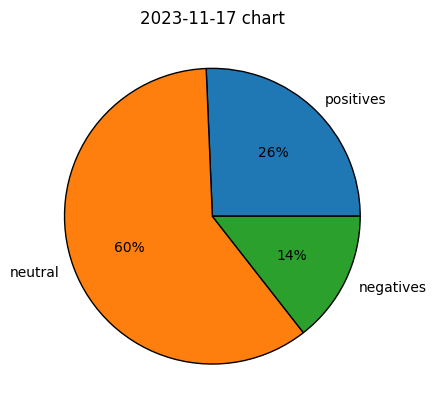

postives=48, neutral=112, negatives=27

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10771,Nice: 69% Of Bitcoin Supply Now Locked Since 1 Year,1.700200e+09,0.90,324,102,BTC,1,2023-11-17 05:51:41
10762,Cathie Wood Speculates Gary Gensler's Political Ambitions Are Affecting Spot BTC ETF Judgement,1.700226e+09,0.89,201,72,BTC,0,2023-11-17 13:01:54
10881,The SEC’s window to greenlight a spot Bitcoin ETF is closing. What’s next?,1.700233e+09,0.88,167,82,BTC,0,2023-11-17 14:58:51
10871,El Salvador has now been buying 1 BTC/day for an entire year,1.700238e+09,0.96,128,16,BTC,0,2023-11-17 16:20:21
10898,"With the exception of 'The Bitcoin Time Traveler' and '1 Bitcoin Will Be Worth 100 million dollars, what are some wildest Bitcoin predictions and speculation you've heard or have for Bitcoin in 10 years? My theory below.",1.700217e+09,0.84,113,110,BTC,1,2023-11-17 10:32:37
10859,Learned today my coworker benefits from bitcoin,1.700246e+09,0.97,106,10,BTC,1,2023-11-17 18:31:15
10866,German Lawmaker Advocates for Bitcoin to Become Legal Tender,1.700242e+09,0.97,101,9,BTC,0,2023-11-17 17:25:57
10772,Strike Rolls Out Bitcoin Purchases To Users Globally,1.700198e+09,0.91,98,25,BTC,0,2023-11-17 05:16:35
10746,"Litecoin Transfers Hit New All-Time High, Beat Bitcoin 2:1",1.700261e+09,0.79,74,42,BTC,0,2023-11-17 22:40:12
10752,"Bloomberg Analyst Says He Heard Insider Rumors About Bitcoin Spot ETF, Bitcoin Price Soars",1.700248e+09,0.75,67,38,BTC,0,2023-11-17 19:01:50



twitter Data 


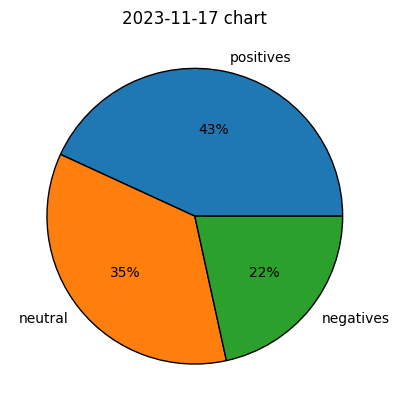

postives=22, neutral=18, negatives=11

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4220,"Hearing chatter SEC’s Trading & Markets engaged w/ exchanges this week on spot bitcoin ETF 19b-4s, is advising them they'd like the ETFs to do cash creates (vs in-kind), and has asked them to get in amendments in next couple wks. This isn't unexpected but good sign nonetheless.",3200.0,252.0,1800000.0,1300.0,1700240536,BTC,0,2023-11-17 17:02:16
4057,"If Bitcoin doesn’t break $40k by end of 2023 I will give $1,000 BTC to 10 people who retweet this post and are following me, I’M CONFIDENT WE WILL SEE $40,000",2900.0,616.0,95000.0,2600.0,1700222084,BTC,1,2023-11-17 11:54:44
4213,JUST IN: SEC is in direct talks with exchanges on spot #Bitcoin ETFs and has advised them to file amendments in next couple weeks - Bloomberg's @EricBalchunas,2800.0,157.0,193000.0,697.0,1700243390,BTC,0,2023-11-17 17:49:50
4049,Someone bought $10 million worth of bitcoin on kraken in one click just before Eric Bloomberg tweet. Big players know ETF is coming,2200.0,249.0,265000.0,409.0,1700243609,BTC,1,2023-11-17 17:53:29
4050,"BREAKING SEC advised exchanges to do cash creates for spot #Bitcoin ETFs, and asked them to file amendments in next couple weeks . This dialogue is healthy and bullish",2100.0,171.0,119000.0,411.0,1700242589,BTC,1,2023-11-17 17:36:29
4221,"I have been making these 3 bitcoin valuation models for 5 years now, and it still amazes me how well they track:1) time model (light blue): adoption over time2) stock-to-flow model (dark blue): scarcity and price jump around halvings3) difficulty model (red): kWh-$ arbitrage",1900.0,99.0,309000.0,324.0,1700228938,BTC,1,2023-11-17 13:48:58
4059,$40k Bitcoin pls god pls,1400.0,433.0,79000.0,225.0,1700202015,BTC,1,2023-11-17 06:20:15
4053,"Bitcoin & ETH spot ETF will 100% get approved. You think world’s biggest companies will file ETFs just to getrejected ?Don’t let this short term volatility scare you. Bitcoin dumped from $20k to $3,200 and then pumped to $69kDon’t miss the signsWE ARE GOING TO $100k+",1100.0,139.0,48000.0,203.0,1700240257,BTC,-1,2023-11-17 16:57:37
4055,2025 is programmed for $100k BTC The price already broke out of the historical triangle. we are alreadyin the early phase of bull run,1000.0,181.0,64000.0,197.0,1700237730,BTC,-1,2023-11-17 16:15:30
4034,I wish I bought more bitcoin under 30k.,985.0,245.0,68000.0,76.0,1700203858,BTC,1,2023-11-17 06:50:58



Reddit Data 


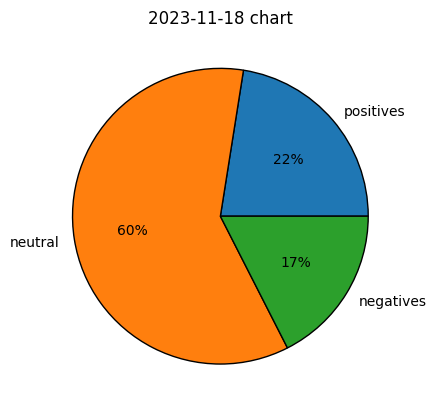

postives=9, neutral=24, negatives=7

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10835,"How To Use Gold To Protect Yourself. Hilarious short video, Bitcoin is exponential gold",1.700282e+09,0.79,11,0,BTC,1,2023-11-18 04:37:59
10665,"SEC Engages Exchanges Over Bitcoin ETF, Fueling Optimism for Approval",1.700267e+09,0.89,7,2,BTC,1,2023-11-18 00:29:01
10832,"The Dutch Central Bank just said the thing CBs never say: the secret of their gold position lies in the fact that when the collapse happens, its value will automatically skyrocket. Next question: how much is enough BTC for a CB to have?",1.700300e+09,0.83,4,1,BTC,-1,2023-11-18 09:26:14
10841,Bitcoin price in relation to EUR removal on Binance,1.700268e+09,0.64,4,1,BTC,0,2023-11-18 00:39:21
10820,Stacking Bitcoin on Lightning Network,1.700299e+09,0.80,3,2,BTC,0,2023-11-18 09:11:50
10726,Spending BTC from Ledger,1.700274e+09,0.76,2,17,BTC,0,2023-11-18 02:23:55
10683,Question: Bitcoin available to send balance,1.700283e+09,0.67,1,4,BTC,0,2023-11-18 04:44:42
10738,"The Incredible Lesson This True Story of a Bitcoiner Who Lost Faith in Bitcoin in November 2022 Teaches You. A year later, he wants to buy back Bitcoin above $30K after losing big...",1.700295e+09,0.52,1,4,BTC,0,2023-11-18 08:16:44
10829,Do you accept Bitcoin as a payment for your work?,1.700306e+09,0.67,1,3,BTC,1,2023-11-18 11:19:31
10677,🚨SEC HAS NEW RULES FOR BITCOIN SPOT ETF APPROVAL & SAM ALTMAN FIRED FROM OPENAI & WORLDCOIN DUMPS!,1.700274e+09,1.00,1,0,BTC,-1,2023-11-18 02:25:45



twitter Data 


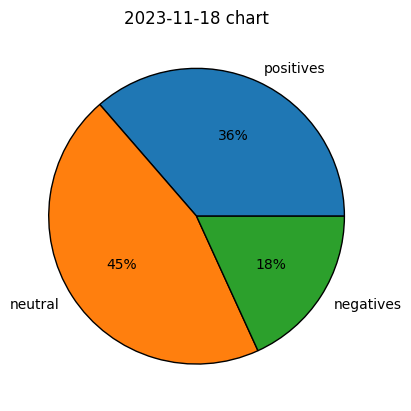

postives=4, neutral=5, negatives=2

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4044,I think Bitcoin is going to $40k Holding all my spot bags. Prayers are appreciated,973.0,210.0,35000.0,135.0,1700284988,BTC,1,2023-11-18 05:23:08
4024,"""Why didn't I but more bitcoin under $100k.""Me in 6 years.",579.0,161.0,35000.0,60.0,1700265682,BTC,0,2023-11-18 00:01:22
4022,Experts: 50k Bitcoin is a magnet. Me and the boys:,265.0,70.0,31000.0,25.0,1700278639,BTC,0,2023-11-18 03:37:19
4021,Bitcoin is in a league of its own.,214.0,165.0,19000.0,15.0,1700289354,BTC,0,2023-11-18 06:35:54
4023,"2 Bitcoin ETFs DELAYED! BlackRock (& Fidelity) move forward w/ Ethereum ETF!Please, Do Not Be Fooled! See here (click) >> https://youtu.be/8lFONvL41GE",199.0,50.0,24000.0,32.0,1700266695,BTC,-1,2023-11-18 00:18:15
4111,.@jpmorgan says the approval of spot $BTC ETFs may not lead to a flood of new capital into the crypto sector.,191.0,66.0,41000.0,44.0,1700286101,BTC,1,2023-11-18 05:41:41
4224,"Due to the popularity of BRC20, Bitcoin’s daily transaction fee was US$11.63 million on November 16, surpassing Ethereum (US$8.446 million) for the first time since mid-November 2020. At the same time, Bitcoin’s daily transaction fee was the highest since May 10.…",102.0,23.0,22000.0,28.0,1700274434,BTC,1,2023-11-18 02:27:14
4227,"Bloomberg ETF analyst Eric Balchunas said he heard the SEC's Trading & Markets division engaged exchanges this week on spot bitcoin ETF 19b-4s, is advising them they'd like the ETFs to do cash created (vs in-kind), and has asked them to get in amendments in next couple weeks.…",65.0,4.0,13000.0,13.0,1700266946,BTC,1,2023-11-18 00:22:26
4229,"The decision of the US SEC regarding the Global X Bitcoin ETF has been delayed until December 22, with a comment period set up for the public to express their opinions within the next 35 days; Additionally, the SEC has also postponed the decision on whether to approve the…",59.0,4.0,25000.0,11.0,1700266105,BTC,-1,2023-11-18 00:08:25
4084,if you're holding #BTC this year!,54.0,100.0,3000.0,5.0,1700290828,BTC,0,2023-11-18 07:00:28





ETH 
Reddit Data 


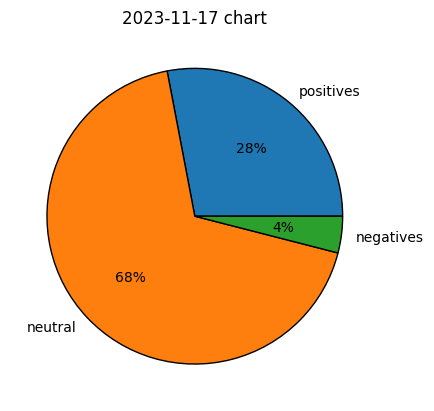

postives=7, neutral=17, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10635,"$TRUCK is inspired by Elon Musk's Cybertruck, and it's built on the Ethereum Blockchain -Join the Huge Community!",1.700248e+09,0.89,380,5,ETH,1,2023-11-17 18:59:10
10653,"$TRUCK is inspired by Elon Musk's Cybertruck, and it's built on the Ethereum Blockchain -Join the Huge Community!",1.700248e+09,0.89,376,5,ETH,1,2023-11-17 18:59:10
10961,"Can Ethereum Shatter the $5,000 Mark? New AI Crypto Targets 30x by 2025",1.700216e+09,0.71,26,72,ETH,0,2023-11-17 10:15:55
10979,How is Ethereum being used in the healthcare field today?,1.700185e+09,0.83,23,11,ETH,0,2023-11-17 01:32:12
11005,"cathie wood just went on cnbc and said solana is an ethereum killer, what are your thoughts? i think it has the potential especially the recent run",1.700195e+09,0.72,17,46,ETH,-1,2023-11-17 04:23:19
10972,Latest Week in Ethereum News,1.700264e+09,0.91,17,2,ETH,0,2023-11-17 23:34:38
10955,ETH fees !!!,1.700222e+09,0.70,16,58,ETH,0,2023-11-17 12:00:41
10953,Cardano Founder Speaks Out On Ethereum Insider Revelations,1.700227e+09,0.63,11,27,ETH,0,2023-11-17 13:11:39
11306,Forthewin Network expands support to Ethereum and Polygon,1.700199e+09,0.81,10,0,ETH,1,2023-11-17 05:25:13
10944,SEC delays Hashdex Nasdaq Ethereum ETF application to next year (Jan 2024),1.700241e+09,0.68,9,29,ETH,0,2023-11-17 17:15:01



twitter Data 


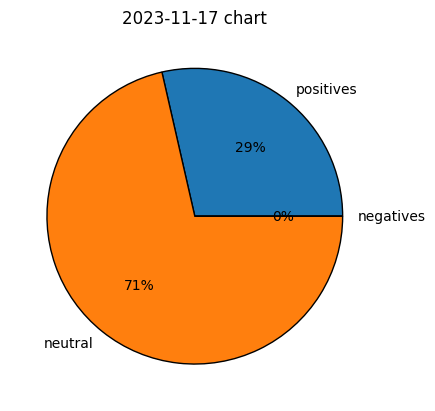

postives=6, neutral=15, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4047,BREAKING FIDELITY HAS JUST FILED FOR AN ETHEREUM ETF. BULLISH FOR ETH,1900.0,144.0,79000.0,330.0,1700260373,ETH,0,2023-11-17 22:32:53
4060,YOU THINK $SOL CAN PULL $ETH ?,1600.0,383.0,182000.0,323.0,1700197330,ETH,0,2023-11-17 05:02:10
4026,BREAKING: FIDELITY just filed for an ETHEREUM ETF.THIS is BULLISH for $ETH,1300.0,94.0,70000.0,295.0,1700261715,ETH,0,2023-11-17 22:55:15
4056,BREAKING SEC DELAYS HASHDEX ETHEREUM SPOT ETF,1000.0,255.0,108000.0,157.0,1700236562,ETH,0,2023-11-17 15:56:02
4046,"$2,500 ETH IS LOADING",838.0,147.0,55000.0,126.0,1700260468,ETH,0,2023-11-17 22:34:28
4027,BREAKING: Fidelity just filed a 19b-4 form (Friday) with CBOE for a proposed spot ethereum ETF.,551.0,66.0,58000.0,100.0,1700261503,ETH,0,2023-11-17 22:51:43
4248,"50,000,000 #USDC (50,007,368 USD) minted at USDC Treasuryhttps://whale-alert.io/transaction/ethereum/0x1515c19e789aaf7ed1f6003a25ada35df6d9d98bcc22b05a8712fdd17bf6da99…",404.0,36.0,76000.0,60.0,1700263523,ETH,0,2023-11-17 23:25:23
4119,"JUST IN: Money management giant @Fidelity is seeking to create an ETF that holds $ETH, according to a Friday filing, joining its rival @BlackRock in strengthening its crypto embrace.@inkbacker reports",362.0,38.0,40000.0,83.0,1700261268,ETH,1,2023-11-17 22:47:48
4258,"An address with a balance of 1,000,000 #USDT (1,000,599 USD) has just been frozen!https://whale-alert.io/transaction/ethereum/0x5f4ffb9e5aa95e8c8b1ed6663c365f7823fa89b0aa1191126215b34d46ea6a94…",309.0,48.0,130000.0,55.0,1700227518,ETH,0,2023-11-17 13:25:18
4253,"18,516 #ETH (35,779,754 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0xc9bb8c8ac62f4091a2776c4239581ee1ab13398bace26ef4e63cf2bfe105c5cc…",254.0,24.0,50000.0,30.0,1700241863,ETH,0,2023-11-17 17:24:23



Reddit Data 


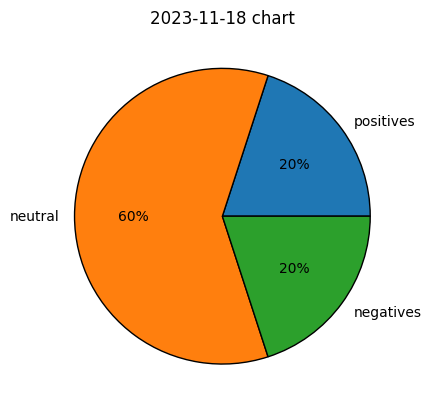

postives=2, neutral=6, negatives=2

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10744,"Fidelity files for spot Ethereum ETF, trailing BlackRock's lead by two days",1.700267e+09,0.87,62,22,ETH,0,2023-11-18 00:25:12
10934,"Fidelity files for spot Ethereum ETF, says approval would be 'major win' for US investors",1.700274e+09,0.85,20,12,ETH,1,2023-11-18 02:25:44
10938,"Fidelity Wants to Create an Ether ETF, Joining BlackRock in Doubling Down on Crypto",1.700266e+09,0.72,11,11,ETH,1,2023-11-18 00:03:53
10930,Fidelity Joins BlackRock in Race for Ethereum ETF,1.700294e+09,0.69,6,27,ETH,0,2023-11-18 07:45:11
10925,"If Ethereum breaks this level, $5,000 is next",1.700296e+09,0.56,4,62,ETH,0,2023-11-18 08:24:05
10664,"Fidelity Files for Spot ETH ETF, Follows BlackRock’s Footsteps",1.700296e+09,1.00,2,5,ETH,0,2023-11-18 08:22:23
10801,"Fidelity Files For Spot Ethereum ETF, Following BlackRock’s Path",1.700268e+09,1.00,2,0,ETH,0,2023-11-18 00:44:34
11052,Former advisor Steven Nerayoff hypes Ethereum scandal exposé (x-post from /r/Cryptocurrency),1.700294e+09,1.00,1,0,ETH,-1,2023-11-18 07:57:27
11075,"Fidelity files for spot Ethereum ETF, trailing BlackRock's lead by two days (x-post from /r/Cryptocurrency)",1.700268e+09,1.00,1,0,ETH,0,2023-11-18 00:36:21
10739,Former advisor Steven Nerayoff hypes Ethereum scandal exposé,1.700294e+09,0.50,0,5,ETH,-1,2023-11-18 07:50:34



twitter Data 


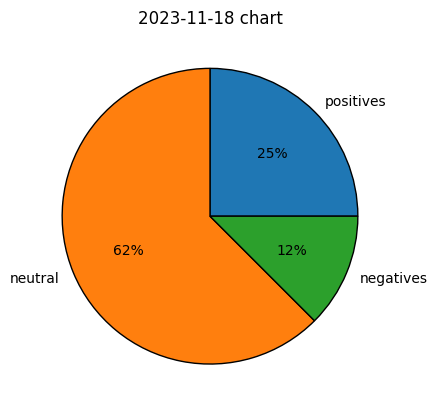

postives=2, neutral=5, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4109,First BlackRock & now Fidelity. The Ethereum ETF applications are coming in fast$ETH,960.0,88.0,50000.0,111.0,1700277244,ETH,0,2023-11-18 03:14:04
4064,"As we edge closer to $ETH's Cancun upgrade, we thought it would be a good idea to bring you up to speed.Here's everything you need to know about it",627.0,190.0,109000.0,143.0,1700272818,ETH,1,2023-11-18 02:00:18
4226,"Following BlackRock, Fidelity became the next giant financial firm to seek to create an ETH spot ETF. The Fidelity Ethereum Fund would be listed by an exchange owned by Cboe Global Markets, which posted the fling that revealed the existence of the proposed product.…",160.0,12.0,40000.0,36.0,1700267656,ETH,1,2023-11-18 00:34:16
4246,"18,373 #ETH (35,651,771 USD) transferred from unknown wallet to #Coinbasehttps://whale-alert.io/transaction/ethereum/0x2012f63fd8107a6ebb2cfc7c472c0211743e62f16e2df6a1caed7a9f24871f7c…",150.0,24.0,28000.0,14.0,1700299373,ETH,0,2023-11-18 09:22:53
4247,"699 #WBTC (25,718,966 USD) transferred from #Binance to unknown wallethttps://whale-alert.io/transaction/ethereum/0xdbe5ef1345f19ed60b68c9d2d075ec7a705e00110aea4fd96da4e576f33e8388…",137.0,17.0,41000.0,13.0,1700265898,ETH,0,2023-11-18 00:04:58
4199,"Drop your $ETH address I will send you $25,000 in 24hRT and Follow",102.0,105.0,4300.0,92.0,1700287626,ETH,-1,2023-11-18 06:07:06
4087,GM fam!What’s the next big hit on the #Ethereum network?,64.0,136.0,3600.0,12.0,1700280022,ETH,0,2023-11-18 04:00:22
4085,The #Ethereum investment playbook:Earn ETHBuy ETH#HODLAchieve financial freedomSimple as that.,55.0,73.0,3300.0,8.0,1700287221,ETH,0,2023-11-18 06:00:21





ETC 
the dataframe is empty in this day: 2023-11-17

twitter Data 


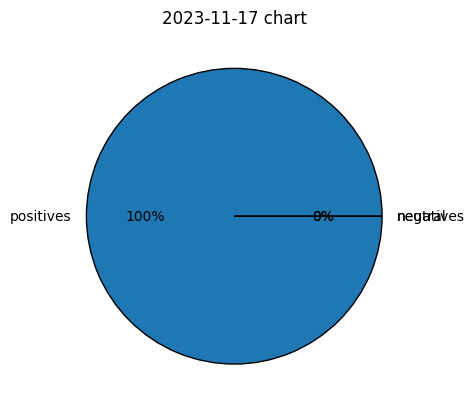

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4000,$iq upbit accumulating Perfect double bottom similar to $aergo $polyx $ardr etc which pumped hard before cuz of #upbit accumulation KOREANS WILL SEND THIS Just today they updated $iq as a ai in category on #coinmarketcap Soon #bybit listing and #binance perp,16.0,3.0,2500.0,8.0,1700256249,ETC,1,2023-11-17 21:24:09



the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Avalanche(AVAX) 
Reddit Data 


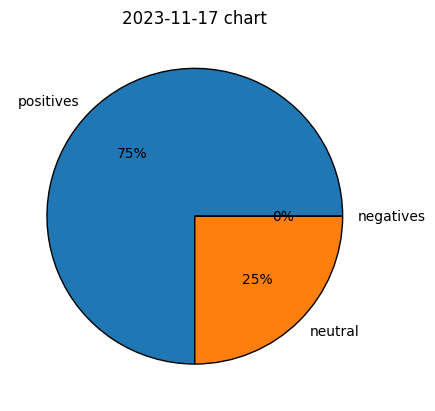

postives=6, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11020,"Republic has chosen Avalanche for the launch of its profit-sharing digital asset, the Republic Note with a dedicated Subnet coming in 2024",1.700241e+09,0.94,27,7,Avalanche(AVAX),1,2023-11-17 17:16:27
11025,The Financial Industry 🤝 Avalanche. Why?,1.700193e+09,0.94,15,1,Avalanche(AVAX),0,2023-11-17 03:49:43
11024,"Avalanche is diving into the gaming scene with a whopping 3.09 billion players. I personally think that titles like Shrapnel and Off The Grid have some serious potential in the competitive scene, while others like DomiOnline and Fableborne feel more casual. There is a little bit of everything IMO.",1.700214e+09,0.94,14,3,Avalanche(AVAX),1,2023-11-17 09:33:06
11026,What Are your Favorite AVAX Gaming tokens?,1.700193e+09,1.00,9,7,Avalanche(AVAX),1,2023-11-17 03:49:31
11021,This is an awesome thread that ensures you won't miss any gaming developments on Avalanche.,1.700237e+09,0.91,8,1,Avalanche(AVAX),1,2023-11-17 15:56:13
11018,Republic Note + Avalanche: the new network for Republic’s flagship digital asset,1.700240e+09,1.00,5,2,Avalanche(AVAX),1,2023-11-17 16:51:25
10719,Help with Coinbase Wallet and AVAX,1.700187e+09,0.44,0,11,Avalanche(AVAX),1,2023-11-17 02:18:03
11027,Dokyo to the moon? Floor price at 30 avax,1.700187e+09,0.50,0,7,Avalanche(AVAX),0,2023-11-17 02:10:18



twitter Data 


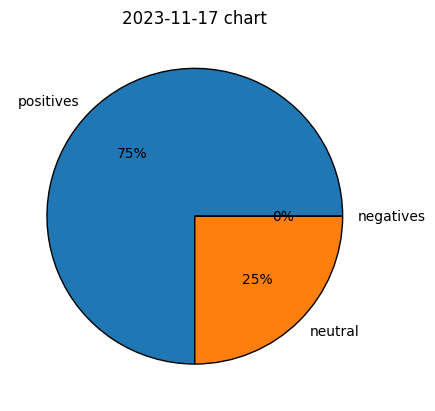

postives=3, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4076,.@avax is sponsoring $25K in prizes at Constellation: A #Chainlink Hackathon.Developers: Build a standout Chainlinked application on Avalanche C-Chain to be eligible for both Chainlink core and Avalanche sponsor prizes.Register now to compete,976.0,32.0,46000.0,165.0,1700237220,Avalanche(AVAX),1,2023-11-17 16:07:00
4138,A profit-sharing digital security from @RepublicCrypto will debut on the @avax blockchain. @realDannyNelson reports,585.0,42.0,100000.0,157.0,1700236986,Avalanche(AVAX),1,2023-11-17 16:03:06
4144,"Avalanche’s $AVAX and Near's $NEAR tokens finish the week among the best performers, with AVAX gaining 50% and NEAR 18% over the past seven days. @LedesmaLyllah and @godbole17 report in First Mover Americas.",188.0,32.0,29000.0,35.0,1700228998,Avalanche(AVAX),1,2023-11-17 13:49:58
4106,Who else is bullish on $AVAX?,68.0,98.0,6200.0,9.0,1700193623,Avalanche(AVAX),0,2023-11-17 04:00:23



Reddit Data 


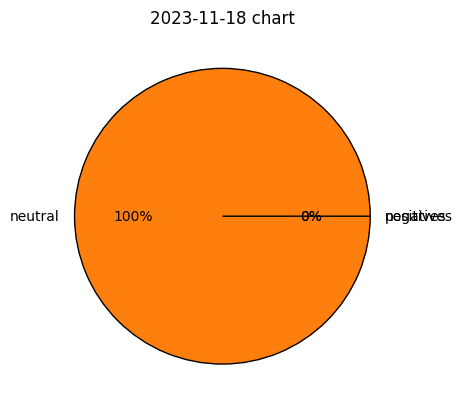

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11016,$CRA is to $AVAX what $BONK is to $SOL,1.700297e+09,0.67,1,4,Avalanche(AVAX),0,2023-11-18 08:45:40



twitter Data 


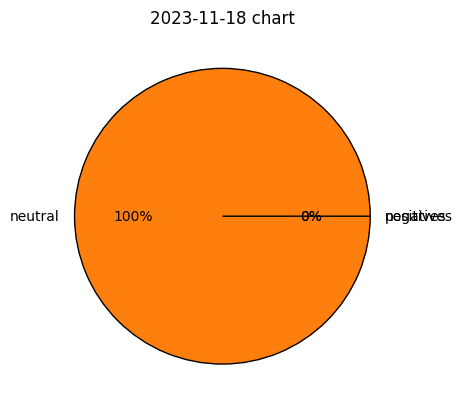

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4225,"The Trader Joe frontend, the largest DEX on Avalanche, was tampered with and the contract address was replaced with a phishing address. Officials stated that there are potential vulnerabilities in the JavaScript code in the third-party analysis plug-in used on the front end. The…",99.0,12.0,48000.0,27.0,1700270666,Avalanche(AVAX),0,2023-11-18 01:24:26





Solana(SOL) 
Reddit Data 


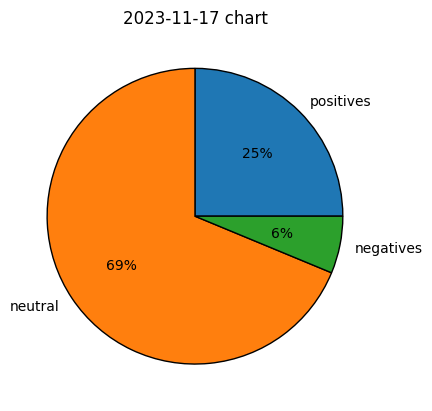

postives=4, neutral=11, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10647,Sir Meme A Lot Solana Token $SMAL,1.700263e+09,0.97,68,3,Solana(SOL),0,2023-11-17 23:19:27
10629,Sir Meme A Lot Solana Token $SMAL,1.700263e+09,0.97,63,3,Solana(SOL),0,2023-11-17 23:19:27
10749,Why do people rushing into SOL? Should I increase the size of my bag?,1.700253e+09,0.55,31,284,Solana(SOL),1,2023-11-17 20:27:30
11004,Jupiter a DEX on Solana announced $JUP for its Users. Major Liquidity Event?,1.700208e+09,0.92,28,5,Solana(SOL),0,2023-11-17 08:05:57
10987,Do you honestly think Solana is the best crypto?,1.700263e+09,0.72,25,66,Solana(SOL),1,2023-11-17 23:13:39
11008,I’m looking to grow my USDC. Where can I stake it safely like how I stake my SOL natively?,1.700187e+09,0.77,18,43,Solana(SOL),1,2023-11-17 02:15:58
10988,Is my Solana wallet hacked? please check the text below,1.700253e+09,0.94,16,10,Solana(SOL),0,2023-11-17 20:23:55
11002,msol vs SOL.. the gap was 6$ up to 10$ at one point,1.700221e+09,0.93,12,4,Solana(SOL),0,2023-11-17 11:36:29
11001,I wanna do some research on SOL but I don’t know where to start,1.700225e+09,0.82,11,16,Solana(SOL),0,2023-11-17 12:51:01
10991,"Solana Developers - The Solana Core Community Call Is Happening Today, November 17th At 19:00 UTC",1.700242e+09,1.00,7,1,Solana(SOL),0,2023-11-17 17:33:59



twitter Data 


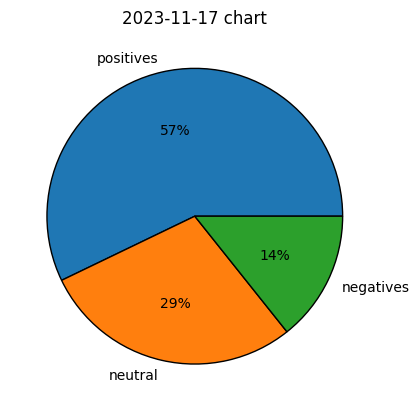

postives=4, neutral=2, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4016,What happens when the world’s largest art fair meets Solana tech?Solana is coming to Miami in a big way Soon™ #artbaselmiamibeach,1000.0,84.0,70000.0,210.0,1700258891,Solana(SOL),1,2023-11-17 22:08:11
4017,"Thank you, Hong Kong! You came, you vibed, you shipped: The Solana x @circle #HackerHouseHongKong showed the Solana community is as strong as ever globally.Stay tuned for 2024’s @hackerhouses and sign up for ecosystem events: http://solana.com/events",902.0,47.0,55000.0,175.0,1700249708,Solana(SOL),1,2023-11-17 19:35:08
4251,"215,122 #SOL (12,353,833 USD) transferred from unknown wallet to #Binancehttps://whale-alert.io/transaction/solana/36p2PB8rk5LpuZwZccoiyUaBhtfvNBmjDP3gSaL7nhExeVhDK42x8PV52NK2wv6ff34j5hd1rBmf9RAqGow2pmCo…",275.0,30.0,58000.0,22.0,1700244020,Solana(SOL),0,2023-11-17 18:00:20
4019,"Web2 & Web3 .ID domain name registrations are now live on @solana via @AllDomains_In association with Internet Service Provider Melsa, we are proud to announce the first-of-its-kind merging of a Web2 domain to a Web3 addressWe’re shaping the future of domains on Solana",246.0,33.0,53000.0,115.0,1700236833,Solana(SOL),1,2023-11-17 16:00:33
4189,Today’s Trending Topics on #CMCCommunity! #Solana#Polygon#Plasma#ElSalvador #Hydra What are your thoughts? Join the convo: https://coinmarketcap.com/community,197.0,139.0,35000.0,53.0,1700215206,Solana(SOL),1,2023-11-17 10:00:06
4180,"#CMCStats: Weekly Market Overview Overall #Crypto market is looking GREEN this week! The 'Fear & Greed Index' has remained on Greed (77)$PIVX $TIA $VLX made big GAINZ, while $KAS $CIRUS $SOL are Trending Will the market stay green next week?",125.0,49.0,28000.0,22.0,1700256606,Solana(SOL),-1,2023-11-17 21:30:06
4094,Curious... do we still have $SOL believers among us?,90.0,104.0,6100.0,10.0,1700226172,Solana(SOL),0,2023-11-17 13:02:52



Reddit Data 


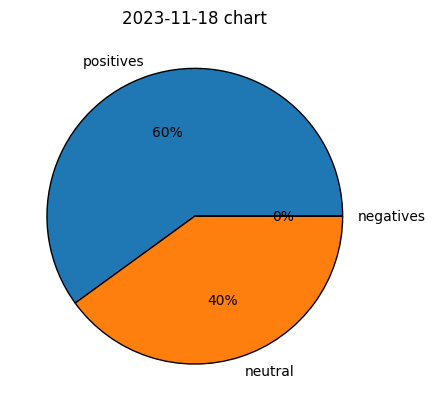

postives=3, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10986,What do I do with all these nfts? Can I recycle them and get some SOL or something lol,1.700267e+09,0.84,8,7,Solana(SOL),1,2023-11-18 00:27:11
10980,I currently have a little issue when trying to bridge from polygon to sol,1.700302e+09,1.00,3,1,Solana(SOL),0,2023-11-18 10:06:31
10982,Small SOL request for basic transaction.,1.700295e+09,0.67,1,2,Solana(SOL),0,2023-11-18 08:06:20
11042,Is Solana good to hold long term? (x-post from /r/Cryptocurrency),1.700305e+09,1.00,1,0,Solana(SOL),1,2023-11-18 10:57:52
10737,Is Solana good to hold long term?,1.700305e+09,0.46,0,12,Solana(SOL),1,2023-11-18 10:55:26



the dataframe is empty in this day: 2023-11-18



Monero(XMR) 
Reddit Data 


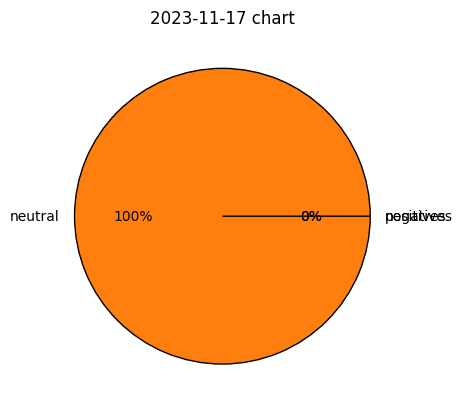

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11015,"Friday Monero Market Thread - November 17, 2023",1.700212e+09,0.92,9,5,Monero(XMR),0,2023-11-17 09:00:40
11014,"We are LIVE from the Monero Soccer field in Formosa, Argentina w/ LIBERTAD_CAL , Escuelitabtc & Mkfs_ext4 TODAY 4PM-EST/6PM-ARG/10PM-CET!",1.700237e+09,0.85,9,1,Monero(XMR),0,2023-11-17 16:11:19



the dataframe is empty in this day: 2023-11-17

Reddit Data 


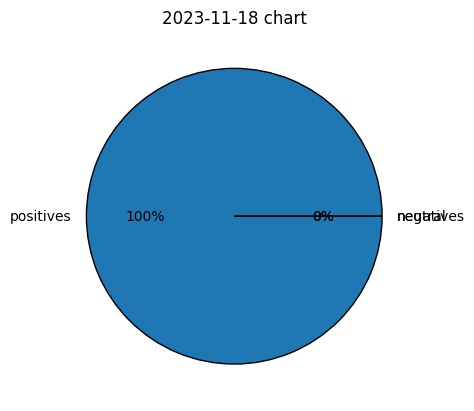

postives=1, neutral=0, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11011,Monero Now Accepted On My Site,1.700269e+09,0.97,32,9,Monero(XMR),1,2023-11-18 01:01:11



the dataframe is empty in this day: 2023-11-18



Optimism(OP) 
Reddit Data 


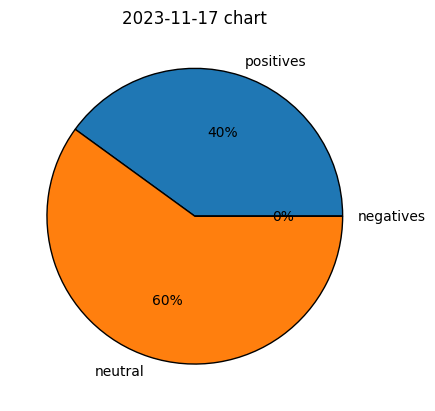

postives=2, neutral=3, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10973,The Completion of Our OP Grant: Defining an Encrypted Mempool for the OP Stack,1.700247e+09,0.92,20,0,Optimism(OP),1,2023-11-17 18:43:05
10976,"Rickrolling the Blockchain: Cartesi, Espresso and Vienna OP Rollup",1.700223e+09,0.88,12,1,Optimism(OP),0,2023-11-17 12:04:08
10764,"First blockchain Rick Roll incident? A tale about Cartesi, Espresso Rick Astley and Vienna OP",1.700224e+09,0.74,7,7,Optimism(OP),0,2023-11-17 12:27:31
10942,The Completion of Our OP Grant: Defining an Encrypted Mempool for the OP Stack,1.700247e+09,0.56,1,3,Optimism(OP),1,2023-11-17 18:44:09
11171,"First blockchain Rick Roll incident? A tale about Cartesi, Espresso Rick Astley and Vienna OP (x-post from /r/Cryptocurrency)",1.700224e+09,1.00,1,0,Optimism(OP),0,2023-11-17 12:33:47



twitter Data 


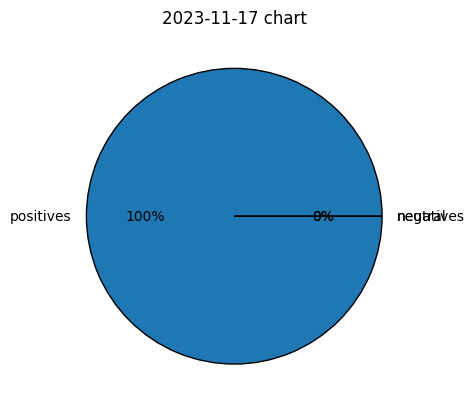

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4215,Immerse yourself in the week's hottest NFT collections on Optimism's OpenSea marketplace! Embark on a journey through the realm of blockchain art and innovation as we highlight the most vibrant NFT collections gaining traction on Optimism. Discovered a favorite? Share it…,3.0,2.0,122.0,NaN,1700235991,Optimism(OP),1,2023-11-17 15:46:31



Reddit Data 


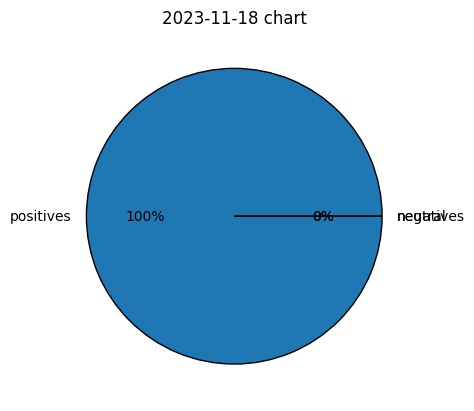

postives=1, neutral=0, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10663,Anticipating Altseason: A Wave of Optimism in the Crypto Markets - Daily Coin Post,1.700307e+09,1.0,1,0,Optimism(OP),1,2023-11-18 11:23:22



twitter Data 


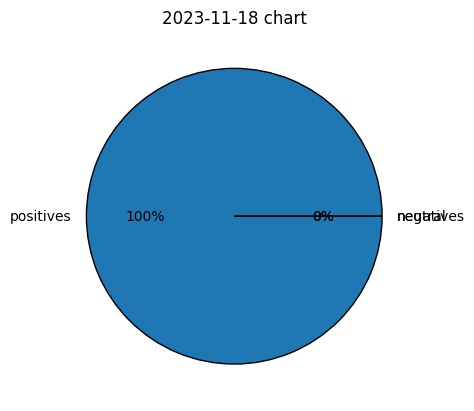

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4214,Discover the top DEXes on Optimism network with highest volume last 24 hours! @Uniswap @KyberNetwork @VelodromeFi@_WOOFi@mummyftm@CurveFinance@beethoven_x@SushiSwap@opxfinance@Clipper_DEXWitness the power of $OP! #Optimism #Layer2 #DEX,4.0,NaN,93.0,NaN,1700284035,Optimism(OP),1,2023-11-18 05:07:15





PAX Gold(PAXG) 
the dataframe is empty in this day: 2023-11-17

the dataframe is empty in this day: 2023-11-17

the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Ripple(XRP) 
Reddit Data 


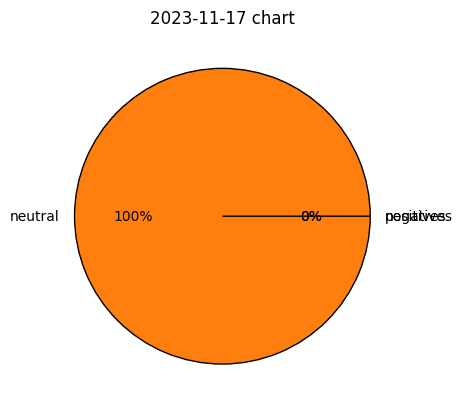

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11259,XRP AMM Amendment,1.700250e+09,0.95,18,15,Ripple(XRP),0,2023-11-17 19:35:08
11258,What to expect from XRP in 2024,1.700256e+09,0.82,16,18,Ripple(XRP),0,2023-11-17 21:12:05



twitter Data 


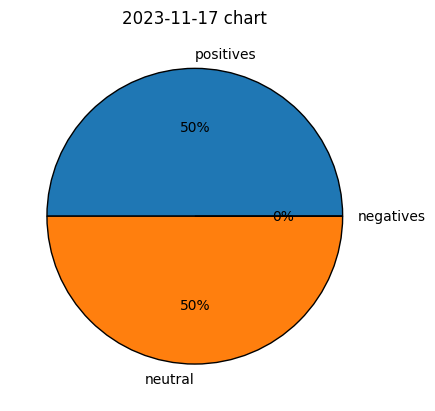

postives=1, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4219,"At #RippleSwell last week, @metaco_sa's @AdrienTreccani spoke on digital asset custody as a crucial piece for building a tokenized economy.",1000.0,63.0,108000.0,294.0,1700259361,Ripple(XRP),1,2023-11-17 22:16:01
4257,"16,600,000 #XRP (10,083,310 USD) transferred from #Bitso to unknown wallethttps://whale-alert.io/transaction/ripple/C816330B58E6C8C69FF7C05149EEB4085FF65568127E1D5EACBFA4C1FFDFF267…",225.0,25.0,49000.0,37.0,1700229630,Ripple(XRP),0,2023-11-17 14:00:30



Reddit Data 


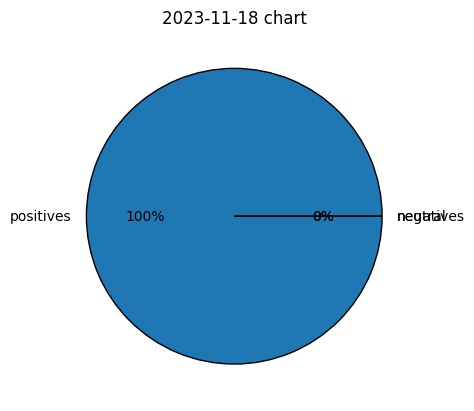

postives=2, neutral=0, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11257,QUESTION PLEASE......Will Swift and fednow be using xrp technology?,1.700266e+09,0.65,7,33,Ripple(XRP),1,2023-11-18 00:07:32
11029,"After an awkward speech during which Gary Gensler claimed to have an unbiased position on cryptocurrency, the Ripple CLO responded with a harsh but justified tackle.",1.700289e+09,1.00,1,0,Ripple(XRP),1,2023-11-18 06:38:16



the dataframe is empty in this day: 2023-11-18



Arbitrum(ARB) 
the dataframe is empty in this day: 2023-11-17

twitter Data 


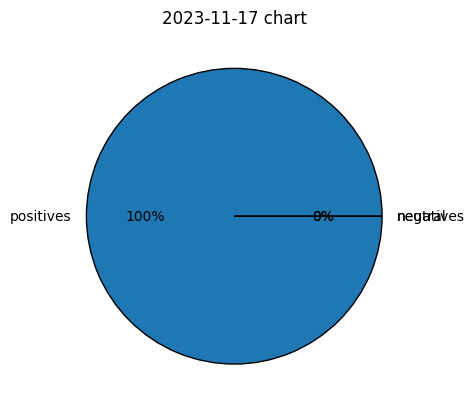

postives=4, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4042,Welcome to the Arbitrum ecosystem @Floor ! Great to see a new way to manage your NFT portfolio on mobile! Learn more here:https://floor.link/app,344.0,24.0,41000.0,67.0,1700245123,Arbitrum(ARB),1,2023-11-17 18:18:43
4038,"Happy Friday Arbinauts! For our 30th edition, we highlight ecosystem developments, community news, opportunities and welcome exciting projects launching on Arbitrum this week! Let's dive in! #WeeklyArbinaut 1/6",199.0,17.0,19000.0,39.0,1700260522,Arbitrum(ARB),1,2023-11-17 22:35:22
4041,"We are proud to announce the winners from the 2nd Web3 ATL Hackathon!• $15,000+ in prizes• 178 sign ups• 33 teams• 20 submissionsWith problem tracks & bounties sponsored by @arbitrum, @chainlink, @RevestFinance, and @404DAO lets dive into the projects that won",69.0,3.0,15000.0,25.0,1700242480,Arbitrum(ARB),1,2023-11-17 17:34:40
4039,Opportunities: Learn about all grants and funding opportunities with the impressive #ArbitrumDAO and Arbitrum Foundation https://arbitrum.foundation/grants5/6,31.0,2.0,9200.0,2.0,1700260523,Arbitrum(ARB),1,2023-11-17 22:35:23



the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Binance(BNB) 
Reddit Data 


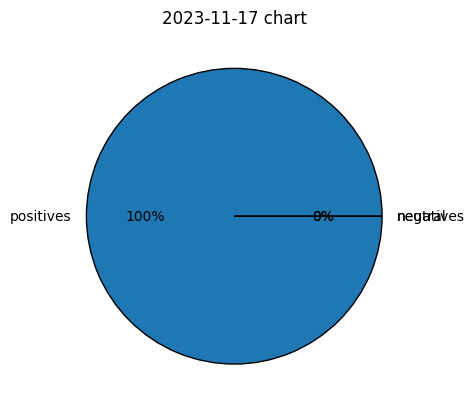

postives=2, neutral=0, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10641,XmarToken - A Passive Income Rewards Token on the BNB Network,1.700209e+09,0.5,0,2,Binance(BNB),1,2023-11-17 08:20:24
10659,XmarToken - A Passive Income Rewards Token on the BNB Network,1.700209e+09,0.5,0,2,Binance(BNB),1,2023-11-17 08:20:24



the dataframe is empty in this day: 2023-11-17

Reddit Data 


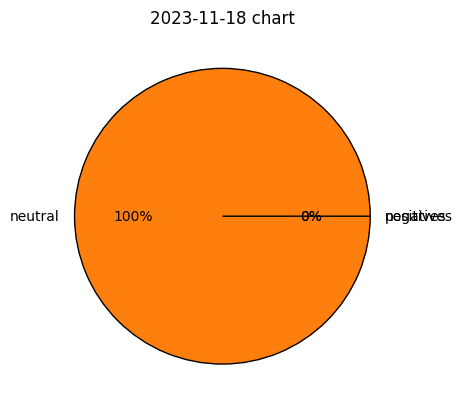

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10680,buying BNB (new to crypto),1.700305e+09,0.5,0,7,Binance(BNB),0,2023-11-18 10:57:35



the dataframe is empty in this day: 2023-11-18



Cardano(ADA) 
Reddit Data 


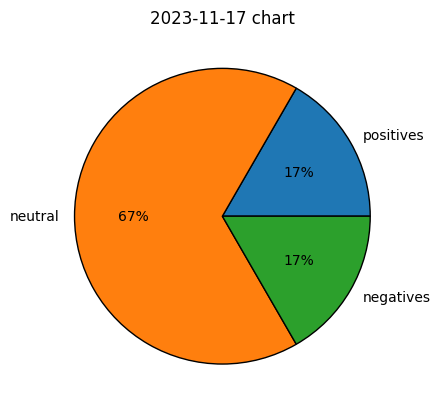

postives=1, neutral=4, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11290,Encoins Announces Mainnet Launch Date: 30 November. Bringing the first privacy protocol and first protocol to integrate zero-knowledge proofs on Cardano,1.700249e+09,0.99,17,1,Cardano(ADA),0,2023-11-17 19:16:24
11286,LATEST CARDANO HIGHLIGHTS,1.700264e+09,0.94,14,6,Cardano(ADA),0,2023-11-17 23:39:28
11289,"Join us as we share the latest updates from EMURGO, the commercial arm of the Cardano blockchain! Learn the latest on Cardano in Africa and more!",1.700254e+09,0.92,9,1,Cardano(ADA),1,2023-11-17 20:40:48
11285,"World Mobile, ENCOINS, Midnight, ADA Markets First Look + More Cardano Updates",1.700265e+09,0.80,6,2,Cardano(ADA),0,2023-11-17 23:56:01
11292,Revisando tokens dentro de Cardano 🎙 Descentralización Total! Podcast sobre #Cardano y más @ChileStakepo,1.700234e+09,0.75,2,1,Cardano(ADA),0,2023-11-17 15:08:35
11293,Missing ADA from wallet!,1.700233e+09,0.50,0,14,Cardano(ADA),-1,2023-11-17 15:04:30



twitter Data 


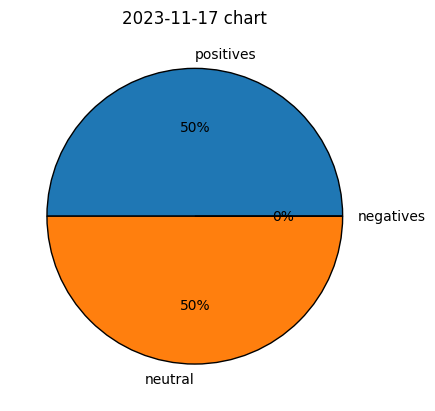

postives=1, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4080,Desert Dining Experience A memorable evening in the Arabian Desert with traditional food and entertainment shared amongst friends and colleagues!Did you attend this remarkable event? Let us know about your experience #CardanoSummit2023 #CardanoCommunity,201.0,9.0,23000.0,34.0,1700209805,Cardano(ADA),1,2023-11-17 08:30:05
4079,It's been 2 weeks since the #CardanoSummit2023 kicked off in Dubai Relive some of the highlights from the event #CardanoCommunity,128.0,9.0,18000.0,32.0,1700246341,Cardano(ADA),0,2023-11-17 18:39:01



Reddit Data 


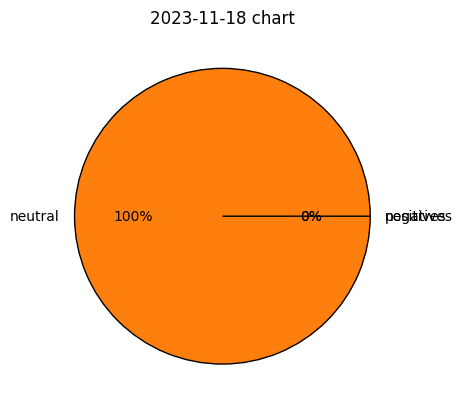

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11281,Encoins: Cardano’s Inaugural Privacy Protocol Set For Nov. 30 Mainnet Launch,1.700281e+09,1.00,17,2,Cardano(ADA),0,2023-11-18 04:24:08
11282,How many years until cardano takes over?,1.700273e+09,0.49,0,30,Cardano(ADA),0,2023-11-18 02:02:51



the dataframe is empty in this day: 2023-11-18



Cosmos(ATOM) 
Reddit Data 


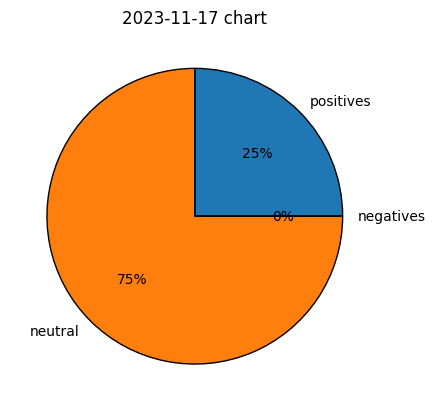

postives=1, neutral=3, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11272,"Hi fellow cosmos friends. I have been buying and staking Atom since 2019, I have earned alot of tokens via airdrops, I have no idea how to exchange them/claim them. I wish to convert them into more atom. Somehow?",1.700231e+09,0.67,3,27,Cosmos(ATOM),1,2023-11-17 14:16:39
11034,OccamDAO Announces Expansion to Cosmos Ecosystem,1.700233e+09,1.00,3,0,Cosmos(ATOM),0,2023-11-17 14:59:48
10678,OccamDAO Announces Expansion to Cosmos Ecosystem,1.700233e+09,1.00,2,0,Cosmos(ATOM),0,2023-11-17 14:59:48
11274,From Cosmos to Etherium,1.700229e+09,0.60,1,3,Cosmos(ATOM),0,2023-11-17 13:47:11



the dataframe is empty in this day: 2023-11-17

Reddit Data 


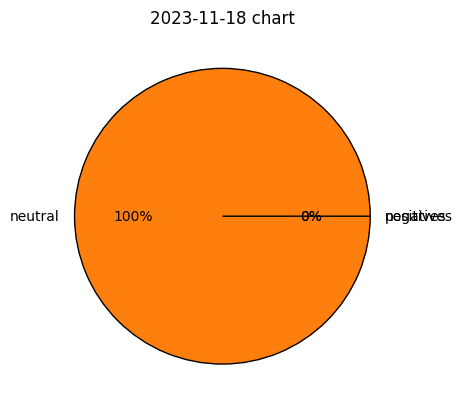

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11266,How does one collect airdrops on ATOM?,1.700305e+09,0.5,0,1,Cosmos(ATOM),0,2023-11-18 11:00:22



the dataframe is empty in this day: 2023-11-18



Litecoin(LTC) 
Reddit Data 


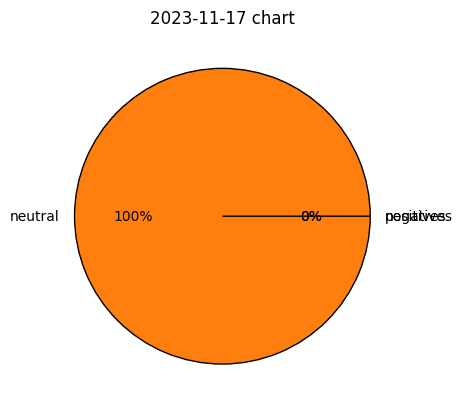

postives=0, neutral=2, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11299,"Introducing Lite.Space: A groundbreaking new platform for Crowdfunding #Litecoin Projects, One Open-Source Project at a Time",1.700249e+09,0.97,24,3,Litecoin(LTC),0,2023-11-17 19:30:59
11298,"Lite.Space: Get Funded, Igniting Litecoin's Future, One Project at a Time!",1.700251e+09,0.90,15,0,Litecoin(LTC),0,2023-11-17 19:58:51



twitter Data 


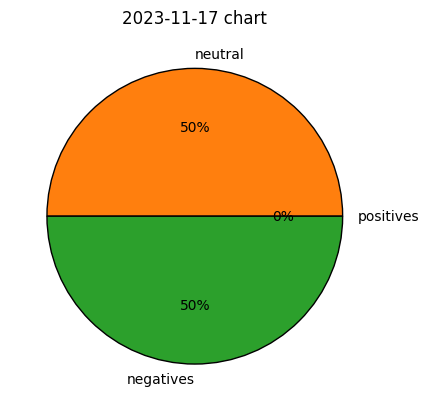

postives=0, neutral=1, negatives=1

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4210,"Network Check: The current Litecoin hashrate is 945TH/s at block height 2,581,814 with a difficulty of 28.8.. With an Average Transaction Fee of $0.01!",248.0,14.0,13000.0,45.0,1700244481,Litecoin(LTC),-1,2023-11-17 18:08:01
4209,"Announcing the launch of http://Lite.Space! A groundbreaking new platform for Crowdfunding #Litecoin Projects, One Open-Source Project at a Time.. Read more about #LiteSpace here: https://lite.space/blog/launch",194.0,18.0,25000.0,80.0,1700247435,Litecoin(LTC),0,2023-11-17 18:57:15



the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Chainlink(LINK) 
the dataframe is empty in this day: 2023-11-17

twitter Data 


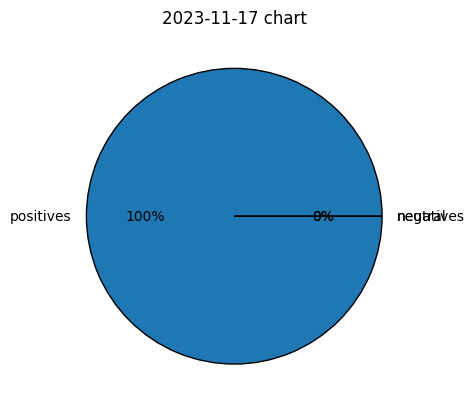

postives=2, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4078,"#Chainlink Price Feeds deliver the hyper-reliable, highly accurate, & decentralized price data needed to power onchain finance. Integrate the USDC/USD Price Feed on @LineaBuild to build secure DeFi markets around @circle’s U.S. dollar-backed stablecoin.",854.0,39.0,35000.0,105.0,1700190420,Chainlink(LINK),1,2023-11-17 03:07:00
4075,"At @EFDevconnect Istanbul, @StaniKulechov and @The3D_ discussed @aave’s new stablecoin powered by #Chainlink CCIP and Data Feeds. Watch Stani explore the importance of CCIP for the multi-chain ecosystem and the mass adoption of DeFi https://youtu.be/UobMS6tumhw",541.0,18.0,33000.0,96.0,1700248020,Chainlink(LINK),1,2023-11-17 19:07:00



the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Aave(AAVE) 
the dataframe is empty in this day: 2023-11-17

the dataframe is empty in this day: 2023-11-17

the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Polygon(MATIC) 
Reddit Data 


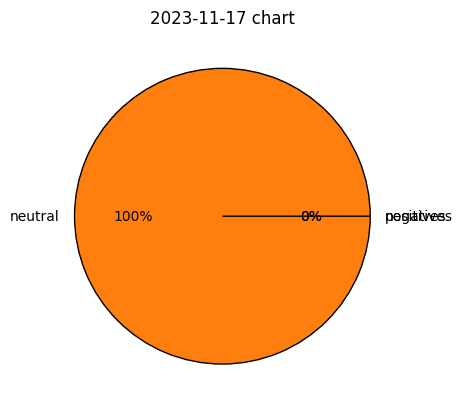

postives=0, neutral=3, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10968,Polygon gas fees spike 1000% amid Ordinals-inspired token craze,1.700189e+09,0.58,4,12,Polygon(MATIC),0,2023-11-17 02:44:56
11264,Can't interact with Staked Matic,1.700244e+09,1.00,3,1,Polygon(MATIC),0,2023-11-17 18:06:48
11265,Daily Polygon Discussion Thread,1.700199e+09,1.00,2,0,Polygon(MATIC),0,2023-11-17 05:30:12



twitter Data 


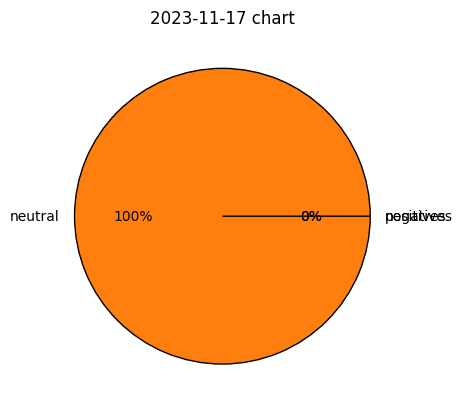

postives=0, neutral=1, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4184,Struggling with the intricacies of the #Polygon lightpaper? Fret not! We're here to simplify the technical jargon and make it more accessible for you. Dive in and understand #Polygon better!,178.0,96.0,29000.0,34.0,1700236808,Polygon(MATIC),0,2023-11-17 16:00:08



Reddit Data 


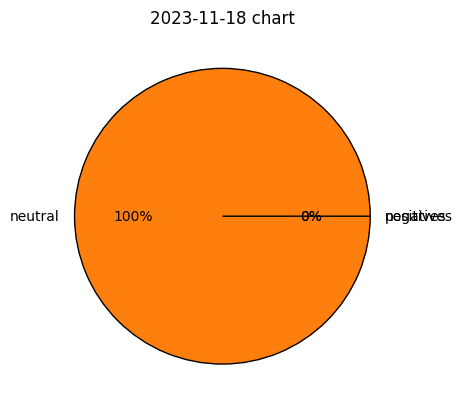

postives=0, neutral=1, negatives=0

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
11263,Daily Polygon Discussion Thread,1.700285e+09,1.0,1,0,Polygon(MATIC),0,2023-11-18 05:30:08



twitter Data 


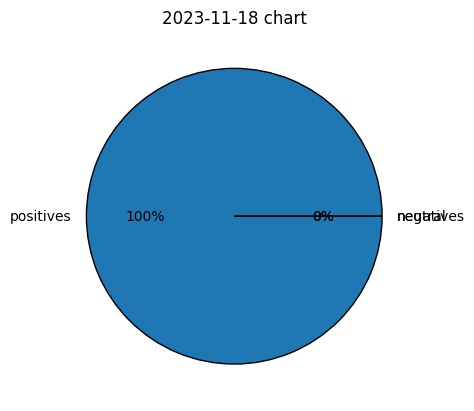

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4175,"From #SK Pension Fund Buying #Coinbase stock to #Polygon gas fees spiking, here is a 2-minute breakdown of everything important that happened in #crypto today.",126.0,51.0,28000.0,16.0,1700278200,Polygon(MATIC),1,2023-11-18 03:30:00





Gas(GAS) 
the dataframe is empty in this day: 2023-11-17

twitter Data 


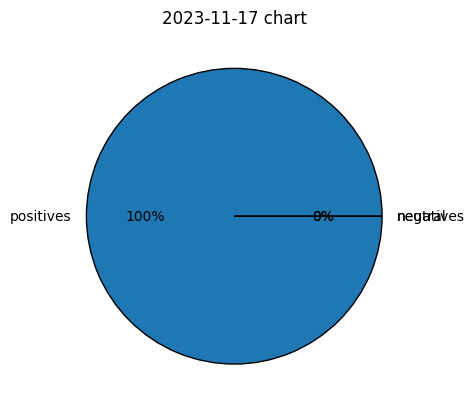

postives=1, neutral=0, negatives=0

,tweet,likes,replies,views,retweets,posted_time,coin_name,label,datetime
4069,The winning helmet design for @PierreGASLY has been chosen. Reveal coming soon,674.0,217.0,103000.0,108.0,1700229699,Gas(GAS),1,2023-11-17 14:01:39



the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18



Cronos(CRO) 
Reddit Data 


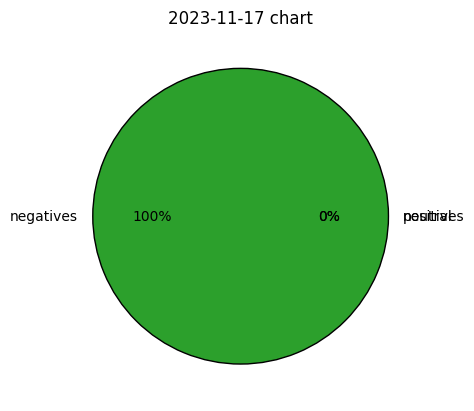

postives=0, neutral=0, negatives=1

,post_text,posted_time,upvote_ratio,post_score,num_comments,coin_name,label,datetime
10788,Cronos withdrew missing,1.700193e+09,0.67,1,6,Cronos(CRO),-1,2023-11-17 03:47:53



the dataframe is empty in this day: 2023-11-17

the dataframe is empty in this day: 2023-11-18

the dataframe is empty in this day: 2023-11-18


In [3]:
startDateObject=datetime.date(2023,11,17)
endDateObject=datetime.date(2023,11,18)

coinNames =[
"BTC",
"ETH", 
"ETC",
"Avalanche(AVAX)",
"Solana(SOL)",
"Monero(XMR)",
"Optimism(OP)",
"PAX Gold(PAXG)",
"Ripple(XRP)", 
"Arbitrum(ARB)",
"Binance(BNB)",
"Cardano(ADA)",
"Cosmos(ATOM)",
"Litecoin(LTC)",
"Chainlink(LINK)", 
"Aave(AAVE)",
"Polygon(MATIC)",
"Gas(GAS)",
"Cronos(CRO)",
]

for coinName in coinNames:
    print(Style.BRIGHT+Back.RESET+Fore.MAGENTA+f"\n\n\n{coinName} ",end=Style.RESET_ALL+Back.RESET+Fore.RESET)
    sentiment_anayled_piechart_of_coin(start_dateObj=startDateObject,end_dateObj=endDateObject,coinName=coinName)
    